In [64]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


C:\Users\alice\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['e', 'spy']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [65]:
pwd

'C:\\Users\\alice\\Documents\\GitHub\\icerm-tda-2019-08\\2021-06\\SECTIONE'

In [93]:
import sys
sys.path.append('C:\\Users\\alice\\Documents\\GitHub\\icerm-tda-2019-08\\figures')
from Python_code import examples as eg
import numpy as np
from numpy import *
from ripser import ripser

In [94]:
prime= 23
toll= 1e-3

In [99]:
points = eg.annulus_example(R=1.5,d=1.5,n=300,Jacobian=False)

In [100]:
from ripser import ripser
import scipy as spy

data_ripser = ripser(points, coeff=prime, do_cocycles=True)

def boundary_cocycles(rout, epsilon):
    # Construct 𝛿⁰
    distances = rout["dperm2all"]
    edges = array((distances<=epsilon).nonzero()).T

    I = c_[arange(edges.shape[0]),arange(edges.shape[0])]
    I = I.flatten()
    J = edges.flatten()
    V = c_[-1 * ones(edges.shape[0]), ones(edges.shape[0])]
    V = V.flatten()

    Delta = spy.sparse.coo_matrix((V,(I,J)), shape=(edges.shape[0], distances.shape[0]))
    # Extract the cocycles
    cocycles = []
    for cocycle in rout["cocycles"][1]:
        val = cocycle[:,2]
        val[val > (prime-1)/2] -= prime
        Y = spy.sparse.coo_matrix((val,(cocycle[:,0],cocycle[:,1])), shape=(distances.shape[0],distances.shape[0]))
        Y = Y - Y.T
        Z = zeros((Delta.shape[0],))
        Z = Y[edges[:,0],edges[:,1]]
        cocycles.append(Z)
    return Delta,cocycles


longest = np.diff(data_ripser["dgms"][1]).argmax()
epsilon = data_ripser["dgms"][1][longest][0]+.01

In [101]:
distances = data_ripser["dperm2all"]

The exact solution is  x = 0                              


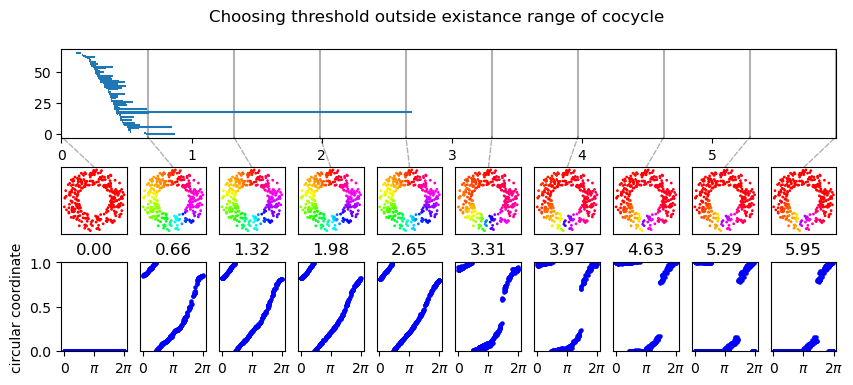

In [126]:
figure(figsize=(10,4),dpi=100)
# figure(figsize=(10,1),dpi=100)
ax1 = plt.subplot(3,1,1)
bars = data_ripser["dgms"][1]
hlines(range(bars.shape[0]),bars[:,0],bars[:,1])
xlim(0,distances.max())
for i,epsilon in enumerate(linspace(0, distances.max(),10)):
    ax1.axvline(epsilon,c='k',alpha=.3,zorder=0)
# show()

# for i,epsilon in enumerate(linspace(data_ripser["dgms"][1][longest][0]+0.0001, data_ripser["dgms"][1][longest][1],10)):
    Delta, cocycles = boundary_cocycles(data_ripser, epsilon)
    edges = array((distances<=epsilon).nonzero()).T

    Z = cocycles[longest]
    zDx = spy.sparse.linalg.lsqr(Delta, array(Z).squeeze())
    gcc = mod(array(zDx[0]), 1.0)

    eg = 'threshold'
    theta = [2*pi-arccos(x/norm([x,y], ord=2)) if arcsin(y/norm([x,y], ord=2))<0 else arccos(x/norm([x,y], ord=2)) for x,y in points]
    
    ax2 = plt.subplot(3,10,i+11)
    scatter(*points.T,c=gcc,cmap='hsv',s=1)
    yticks([])
    xticks([])
    gca().set_aspect(1)
    
    
    con = ConnectionPatch(xyA=(0,3.2), xyB=(epsilon,-2), coordsA="data", coordsB="data",
                          axesA=ax2, axesB=ax1, color="k",alpha=.3,ls='dashed')
    ax2.add_artist(con)
#     for a,b in edges:
#         Ax,Ay = points[a]
#         Bx,By = points[b]
#         plot([Ax,Bx],[Ay,By],c='k',zorder=0,alpha=.5)
    plt.subplot(3,10,i+21)
    scatter(theta,gcc,c='b',s=5)
    title('{0:.2f}'.format(epsilon))
    if i>0:
        yticks([])
    else:
        ylabel('circular coordinate')
    xticks([0,pi,2*pi],[0,'$\pi$','2$\pi$'])
    ylim(0,1)
    
plt.suptitle('Choosing threshold outside existance range of cocycle')
savefig(egx+'-1.pdf',format='pdf')

In [112]:

from matplotlib.patches import ConnectionPatch

# i = 10
# xy = (x[i],y[i])
# con = ConnectionPatch(xyA=xy, xyB=xy, coordsA="data", coordsB="data",
#                       axesA=ax2, axesB=ax1, color="red")
# ax2.add_artist(con)

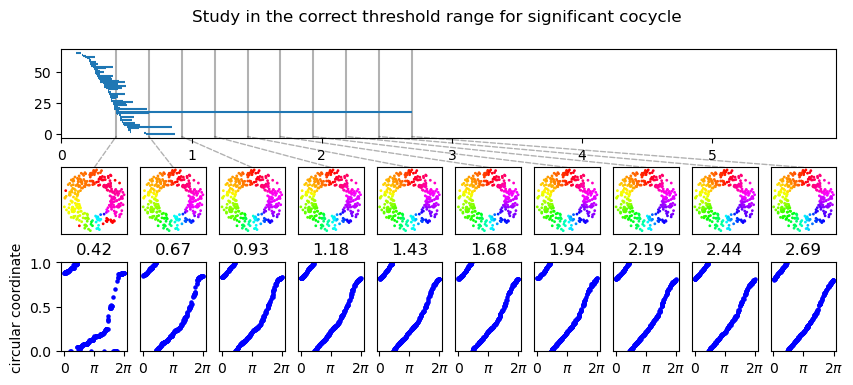

In [128]:
figure(figsize=(10,4),dpi=100)
# figure(figsize=(10,1),dpi=100)
ax1 = plt.subplot(3,1,1)
bars = data_ripser["dgms"][1]
hlines(range(bars.shape[0]),bars[:,0],bars[:,1])
xlim(0,distances.max())
for i,epsilon in enumerate(linspace(data_ripser["dgms"][1][longest][0]+0.0001, data_ripser["dgms"][1][longest][1],10)):
    ax1.axvline(epsilon,c='k',alpha=.3,zorder=0)
# show()

# for i,epsilon in enumerate(linspace(data_ripser["dgms"][1][longest][0]+0.0001, data_ripser["dgms"][1][longest][1],10)):
    Delta, cocycles = boundary_cocycles(data_ripser, epsilon)
    edges = array((distances<=epsilon).nonzero()).T

    Z = cocycles[longest]
    zDx = spy.sparse.linalg.lsqr(Delta, array(Z).squeeze())
    gcc = mod(array(zDx[0]), 1.0)

    eg = 'threshold'
    theta = [2*pi-arccos(x/norm([x,y], ord=2)) if arcsin(y/norm([x,y], ord=2))<0 else arccos(x/norm([x,y], ord=2)) for x,y in points]
    
    ax2 = plt.subplot(3,10,i+11)
    scatter(*points.T,c=gcc,cmap='hsv',s=1)
    yticks([])
    xticks([])
    gca().set_aspect(1)
    
    
    con = ConnectionPatch(xyA=(0,3.2), xyB=(epsilon,-2), coordsA="data", coordsB="data",
                          axesA=ax2, axesB=ax1, color="k",alpha=.3,ls='dashed')
    ax2.add_artist(con)

#     for a,b in edges:
#         Ax,Ay = points[a]
#         Bx,By = points[b]
#         plot([Ax,Bx],[Ay,By],c='k',zorder=0,alpha=.5)

    plt.subplot(3,10,i+21)
    scatter(theta,gcc,c='b',s=5)
    title('{0:.2f}'.format(epsilon))
    if i>0:
        yticks([])
    else:
        ylabel('circular coordinate')
    xticks([0,pi,2*pi],[0,'$\pi$','2$\pi$'])
    ylim(0,1)
    
plt.suptitle('Study in the correct threshold range for significant cocycle')
savefig(eg+'-2.pdf',format='pdf')

In [108]:
np.savetxt('Fig-E-sample.txt',points)